<a href="https://colab.research.google.com/github/Kitagawa-Mariin/HenryPark_Python/blob/Machine_Learning/7_3_NeuralNetworkTraining_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fit() method를 사용하면, History class 객체를 반환. 훈련 과정에서 계산한 지표: 손실과 정확도 값이 저장되어 있다.

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

def model_fn(a_layer=None): #모델만드는 function
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer: #a_layer 매개변수로 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가.
      model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = model_fn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
#verbose = 1 default value
#verbose = 2 진행막대 빼고 출력
#verbose = 0 훈련 과정을 나타내지 않음.

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


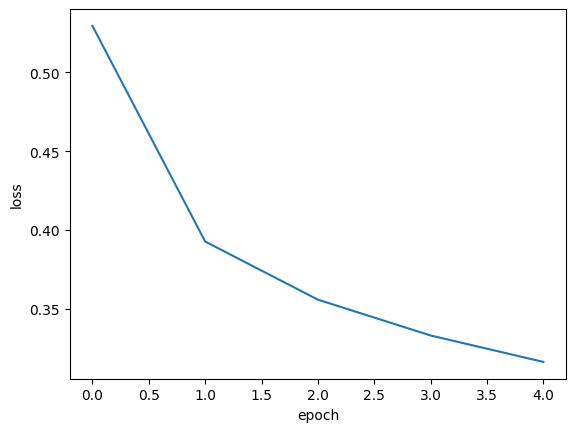

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

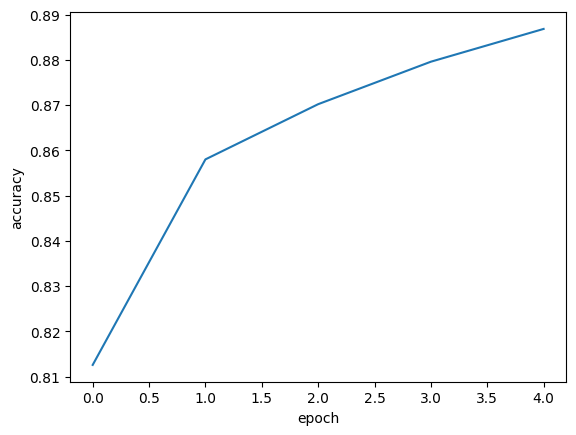

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

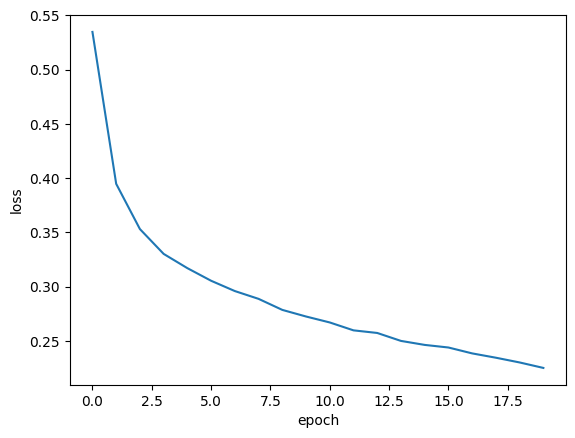

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수뿐만 아니라 **검증 세트**에 대한 점수도 필요.

(인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 손실 함수. 손실 감소에 비례하여 정확도가 높아지지 않느 경우도 있음)

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


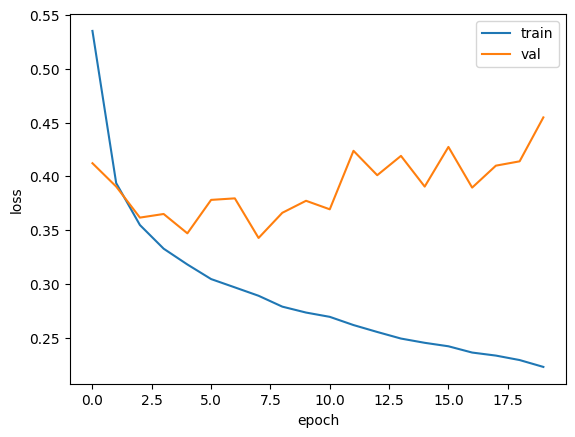

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show() #초기에 검증 손실이 감소하다가 다섯 번째 에포크 만에 다시 상승.
#과대적합 방지해야됨!!!!

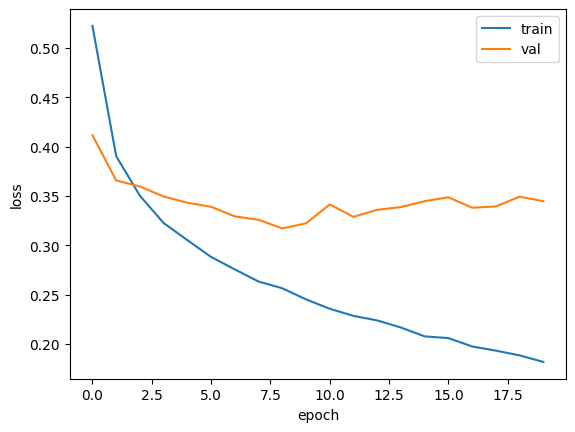

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

***Dropout*** \

훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막음.

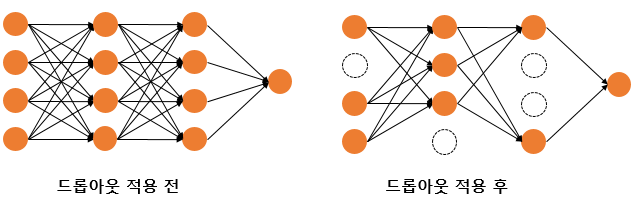

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary() #dropout층은 훈련되는 모델 파라미터가 없음.
#입력과 출력의 크기가 같음. 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음.

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


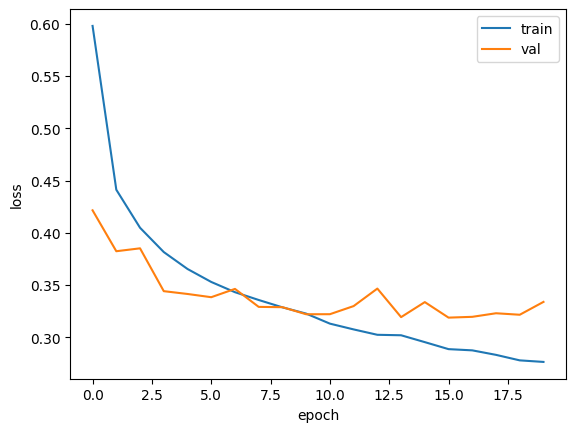

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target)) #epochs 10일 때 가장 안정적.

In [ ]:
#훈련된 모델의 파라미터를 저장하는 save_weights()
model.save_weights('model-weights.h5') #HDF5 포멧으로 저장.
#모델 구조와 모델 파라미터를 함께 저장하는 save()
model.save('model-whole.h5')
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Jul  8 03:40 model-weights.h5
-rw-r--r-- 1 root root 981176 Jul  8 03:40 model-whole.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

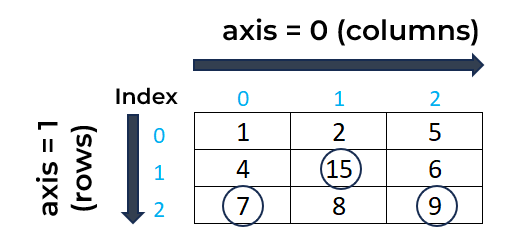

axis = -1 은 마지막 차원을 따라 최댓값을 고름.

In [ ]:
#모델의 파라미터만 가져와서 적용시켰을 때.
#파라미터만 가져왔을 때, evaluate()를 사용할려면, compile 먼저 해야함.
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1) #배열에서 가장 큰 값의 인덱스 반환.
print(np.mean(val_labels == val_target)) #고른 인덱스와 타깃을 비교 했을 때, 두 배열에서 각 위치의 값이 같으면 1, 다르면 0
#평균하면 정확도가 됨.


375/375 [==============================] - 1s 2ms/step
0.8764166666666666


In [ ]:
#전체 모델을 저장하고 다시 불러들였을 때.
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)#모델의 구조와 옵티마이저 상태까지 모두 복원하기 때문에 evaluate()사용가능.

375/375 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8764


[0.338388055562973, 0.8764166831970215]

***Callback*** \

훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체.

ModelCheckpoint: 기본적으로 에포크마다 모델을 저장. save_best_only=True 매개변수를 지정해서 가장 낮은 검증 점수를 만드는 모델을 저장.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb]) #epochs 20개 돌리면서 loss 가장 낮을 때의 모델 저장.
                    #위에 처럼 에포크마다 loss, accuracy 보고 찾을 수고 덜어줌.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3118 - accuracy: 0.8850


[0.31183743476867676, 0.8849999904632568]

***Early stopping*** \

앞에서 에포크 20번 돌리는 거보다, 과대적합이 시작될 때 훈련을 중지. 컴퓨터 자원과 시간을 아낄 수 있다.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
#patience=2로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련을 중지.
#restore_best_weights=True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림.
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])
#ModelCheckpoint 콜백과 함께 사용하면 최상의 모델을 자동으로 저장.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(early_stopping_cb.stopped_epoch)
#0부터 시작하기 때문에 11은 12째 에포크에서 훈련 중지. 최상의 모델은 10번째 모델.

11


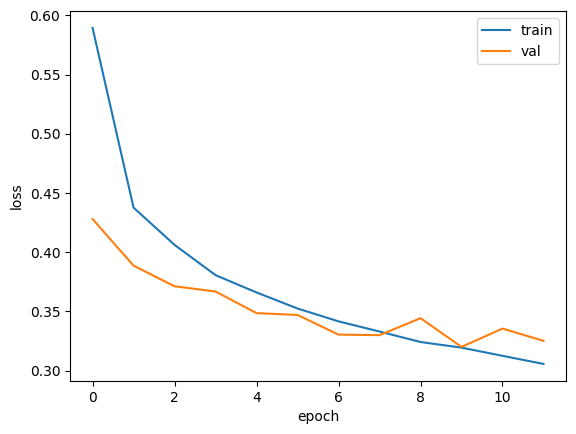

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3200 - accuracy: 0.8863


[0.3199803829193115, 0.8863333463668823]